## **Denoising audio using Bandpass Butterworth filter**
Bandpass Butterworth filter is generally used when you want to isolate a specific frequency range. For guitar audio, we need to the audio that lies only between the possible frequency range for acoustic guitar notes.
<br><br><br>
**What is Bandpass filter?**<br>
It is a type of filter that allows only specific range of frequency to pass through
<br><br>
**What is Butterworth filter?**<br>
It is a type of filter designed to have smooth response in the frequency domain
<br><br>

A **Bandpass Butterworth filter** gives a response that has both the above mentioned effects on it.

In [9]:
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt


In [ ]:

def visualize_waveform(y, sr, title):
    plt.figure(figsize=(12, 4))
    librosa.display.waveshow(y, sr=sr)
    plt.title(title)
    plt.xlabel("Time")
    plt.ylabel("Amplitude")
    plt.show()


In [ ]:

def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a

def apply_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = filtfilt(b, a, data)
    return y


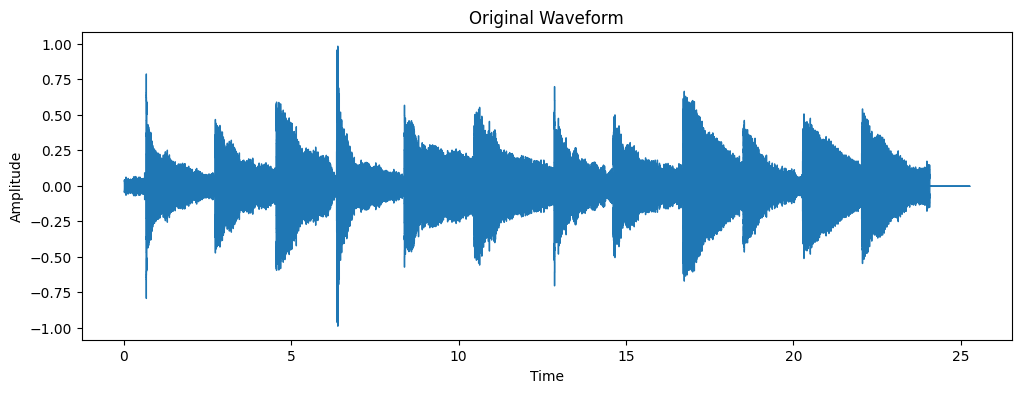

In [11]:

# Load the audio file
file_path = 'c-chord.wav'
y, sr = librosa.load(file_path)

# Visualize original waveform
visualize_waveform(y, sr, "Original Waveform")


In [12]:

# Apply bandpass filter
lowcut = 80  # Hz
highcut = 5000  # Hz
y_filtered = apply_bandpass_filter(y, lowcut, highcut, sr)


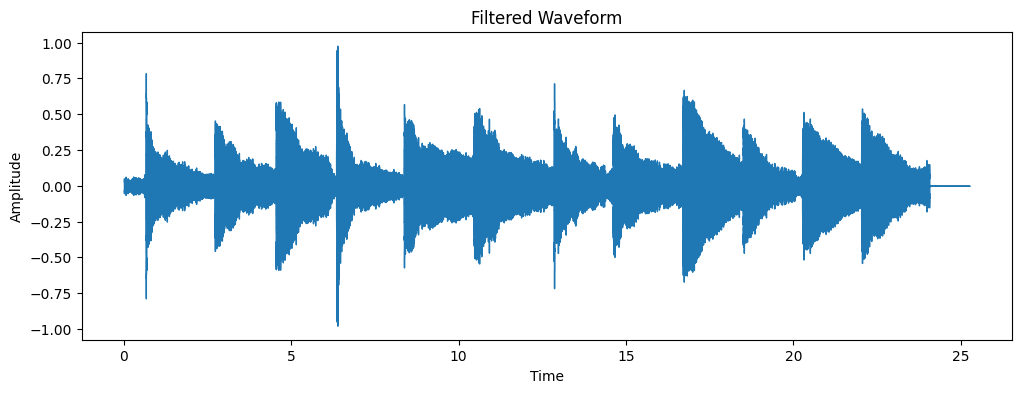

In [13]:

# Visualize filtered waveform
visualize_waveform(y_filtered, sr, "Filtered Waveform")


In [14]:

# Save the filtered audio
import soundfile as sf
sf.write('c-chord_filtered.wav', y_filtered, sr)